# Projet Python : House Price

# Binôme :
### - Ahmed Seyfeddine GOUMEIDA - MLDS
### - Mohammed Erifai MAAMIR - MLDS

# 1/ DATA PROCESSING

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
with open('House_Price.csv') as f:
    df = pd.read_csv(f)
f.close()
print("--------------- Head ---------------")
print(df.head())
print()
print("--------------- Info ---------------")
print(df.info())

--------------- Head ---------------
   price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
0   24.0       32.31     0.538     6.575  65.2   4.35   3.81   4.18   4.01   
1   21.6       37.07     0.469     6.421  78.9   4.99   4.70   5.12   5.06   
2   34.7       37.07     0.469     7.185  61.1   5.03   4.86   5.01   4.97   
3   33.4       32.18     0.458     6.998  45.8   6.21   5.93   6.16   5.96   
4   36.2       32.18     0.458     7.147  54.2   6.16   5.86   6.37   5.86   

   teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall  \
0      24.7       4.98     YES       5.480      11.1920     River        23   
1      22.2       9.14      NO       7.332      12.1728      Lake        42   
2      22.2       4.03      NO       7.394     101.1200      None        38   
3      21.3       2.94     YES       9.268      11.2672      Lake        45   
4      21.3       5.33      NO       8.824      11.2896      Lake        55   

  bus_ter     parks

### High or Low Feature Variability
The first step I typically take is reviewing the unique count of values per feature to determine if any features can be quickly deleted due to very high or very low variability. In other words, do we have any features which have as many unique values as the length of the dataset or features which have just one unique value?

In [2]:
print("--------------- Discription sur les colonnes ---------------")

print("column", "nunique", "len")
print("------", "-------", "---")

for col in df.columns:
    print(col, df[col].nunique(), len(df))


--------------- Discription sur les colonnes ---------------
column nunique len
------ ------- ---
price 228 506
resid_area 76 506
air_qual 81 506
room_num 446 506
age 356 506
dist1 339 506
dist2 354 506
dist3 339 506
dist4 353 506
teachers 46 506
poor_prop 455 506
airport 2 506
n_hos_beds 454 506
n_hot_rooms 423 506
waterbody 4 506
rainfall 42 506
bus_ter 1 506
parks 506 506
Sold 2 506


We notice that the column "bus_ter" has only one value which is "YES". so we remove this column using the manual code below

In [3]:
#df.drop(['bus_ter'], axis=1, inplace=True)

or automatically with the this code that detect and delete the columns that have only one value

In [4]:
for col in df.columns:
     if df[col].nunique() == 1: 
        print(col, df[col].nunique(), len(df))
        df.drop([col], axis=1, inplace=True)


bus_ter 1 506


In [5]:
print("--------------- Discription sur les colonnes ---------------")

print("column", "nunique", "len")
print("------", "-------", "---")

for col in df.columns:
    print(col, df[col].nunique(), len(df))


--------------- Discription sur les colonnes ---------------
column nunique len
------ ------- ---
price 228 506
resid_area 76 506
air_qual 81 506
room_num 446 506
age 356 506
dist1 339 506
dist2 354 506
dist3 339 506
dist4 353 506
teachers 46 506
poor_prop 455 506
airport 2 506
n_hos_beds 454 506
n_hot_rooms 423 506
waterbody 4 506
rainfall 42 506
parks 506 506
Sold 2 506


### Duplicate Features


Next, by examining the codebook, which contains the definitions for each feature, we search if we have any duplicate features. For example, “first variable” can be numerical feature that produces the code that matches the "the second variable” feature. We can drop one of these features.
in our case each feature contains only one information 

### Odd Values and Data Collection Mistakes


In [6]:
for col in df.columns:
    print(col, df[col].unique(), len(df))

price [24.  21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 15.  21.7 20.4 18.2
 19.9 23.1 17.5 20.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.
 12.7 13.2 13.1 13.5 20.  24.2 30.8 34.9 26.6 25.3 24.7 21.2 19.3 14.4
 19.4 19.7 20.5 25.  23.4 35.4 31.6 23.3 18.7 16.  22.2 33.  23.5 22.
 17.4 20.9 22.8 24.1 21.4 20.8 20.3 28.  23.9 24.8 22.5 23.6 22.6 20.6
 28.4 38.7 43.8 33.2 27.5 26.5 18.6 20.1 19.5 19.8 18.8 18.5 18.3 19.2
 17.3 15.7 16.2 18.  14.3 23.  18.1 17.1 13.3 17.8 14.  13.4 11.8 13.8
 14.6 15.4 21.5 15.3 17.  41.3 24.3 27.  50.  22.7 23.8 22.3 19.1 29.4
 23.2 24.6 29.9 37.2 39.8 37.9 32.5 26.4 29.6 32.  29.8 30.5 36.4 31.1
 29.1 33.3 30.3 34.6 32.9 42.3 48.5 24.4 22.4 28.1 23.7 26.7 30.1 44.8
 37.6 46.7 31.5 31.7 41.7 48.3 29.  25.1 17.6 24.5 26.2 42.8 21.9 44.
 36.  33.8 43.1 48.8 31.  36.5 30.7 43.5 20.7 21.1 25.2 35.2 32.4 33.1
 35.1 45.4 46.  32.2 28.5 37.3 27.9 28.6 27.1 36.1 28.2 16.1 19.  32.7
 31.2 17.2 16.8 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 11.5 15.1
  9

From the codebook, we know that features such as “airport”is binary coding for “Yes” and “No”. In order to simplify our analysis and help with formatting, we need to convert the binary to string. 

Finally, we search if there is a coding mistake for like "YES" "yes" "NO" "no"  which needs to be corrected.in our case there is no mistake in this type

### Examining Cardinality


In [7]:
for var in df.columns:
    print(var, '\n', df[var].value_counts()/len(df))


price 
 50.0    0.031621
25.0    0.015810
21.7    0.013834
23.1    0.013834
19.4    0.011858
          ...   
14.2    0.001976
7.4     0.001976
26.7    0.001976
32.9    0.001976
9.7     0.001976
Name: price, Length: 228, dtype: float64
resid_area 
 48.10    0.260870
49.58    0.059289
38.14    0.043478
36.20    0.035573
51.89    0.029644
           ...   
30.74    0.001976
31.89    0.001976
32.31    0.001976
31.21    0.001976
31.76    0.001976
Name: resid_area, Length: 76, dtype: float64
air_qual 
 0.538    0.045455
0.713    0.035573
0.437    0.033597
0.871    0.031621
0.624    0.029644
           ...   
0.518    0.001976
0.394    0.001976
0.435    0.001976
0.385    0.001976
0.422    0.001976
Name: air_qual, Length: 81, dtype: float64
room_num 
 6.167    0.005929
6.405    0.005929
5.713    0.005929
6.417    0.005929
6.127    0.005929
           ...   
7.287    0.001976
7.267    0.001976
6.762    0.001976
6.484    0.001976
5.960    0.001976
Name: room_num, Length: 446, dtype: float64
age

### Low Variance

Cardinality refers to the number of unique values/categories for each feature. Numeric, especially continuous, features will have very high cardinality but we mainly need to concern ourselves from categorical features. First, we need to identify features that contain values/categories which suck up all the variance. In other words, 90%+ of all the observations fall under one or two values. 
in our case there is no probleme because the majority of the cariables are values , and they probably have the same number of cardiality
### Rare Values/Categories

Using the same code as above, we once again turn our attention onto categorical features but this time we are looking for values which we consider “rare”. How you define “rare” is really up to you but I have found that this decision has to be made a feature by feature. Some values might be rare if they appear less than 1% of the time. In other features, the threshold might be 2% or even 5%. Our ultimate goal will be to group these values together into a new value/category called “rare”. This procedure reduces the overall cardinality of the feature and if you choose to one-hot encode your categories features this method will drastically reduce the number of newly created “dummy” features.

in our case there is no probleme for exemple 
airport :
YES    0.551383
NO     0.448617

# 2/ Missing Values

Deciding how to process missing values is one of the most important and contentious decisions a data scientist will make.

In [8]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(" the feature : {" , var,"} contains missing values with %=", df[var].isnull().mean().round(3))

 the feature : { n_hos_beds } contains missing values with %= 0.016


{ n_hos_beds }  :  is a categorical feature with only a few missing data points = 0.016 . We can impute this data using the mode as this wouldn’t change the distribution of the feature.
if the missing data is so big (0.4) in this case it will affect the distribution of the feature so it's better to drop the lignes that contains the null or  the feature it self

In [9]:
#df["n_hos_beds"].fillna(df["n_hos_beds"].mode()[0], inplace=True)

we can use the code above to delete a specific column or delete automatically the column that contains null valuesverification that there is no feature with null values.

In [10]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(" the feature : {" , var,"} contains missing values with %= ", df[var].isnull().mean().round(3))
        df[var].fillna(df["n_hos_beds"].mode()[0], inplace=True)

 the feature : { n_hos_beds } contains missing values with %=  0.016


# 2-2/ Categorical to Numirical


In [11]:
df['waterbody'] = pd.factorize(df.waterbody)[0]
df['airport'] = pd.factorize(df.airport)[0]

# 3/ Outlier treatment


Outliers are another contentious topic which requires some thought. There are a number of ways of dealing with outliers. If you have a very large dataset and a relatively small number of outliers you can simply delete them. I’m usually wary of this method as it changes the distribution of said feature(s) which might cause new values to become outliers. That said, it is an option often utilized. Other methods include adding an indicator feature, rescaling the entire feature using np.log(), and transforming a continuous feature into discrete by applying discretization which will encompass the outliers into one bin.

First, we need to identify if we have any outliers. The most well-known method for identifying outliers is the z-score method which standardizes the feature values to a mean of zero, a standard deviation of one, and any value which falls 3 standard deviations (plus or minus) is considered an outlier. Personally, I believe this method is flaw as the z-score relies on the mean and standard deviation of the feature. Both the mean and standard deviation are highly influenced by existing outliers. Any outlier included in the calculation of the mean and standard deviation will expand the range of the z-scores and potentially omitting existing outliers. This problem can be overcome by utilizing the median instead of the mean.

Let’s utilize a more robust method that relies on the inter-quartile range and the median. You can adjust this method and use (3 * IQR) to identify only the extreme outliers.

In [12]:
def outlier_treatment(feature):
    sorted(feature)
    q1,q3 = np.percentile(feature , [25,75])
    IQR = q3 - q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range,upper_range


lower_range, upper_range = outlier_treatment(df['price'])
df[(df['price'] < lower_range) | (df['price'] > upper_range)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
97,38.7,32.89,0.4450,8.069,76.0,3.70,3.32,3.57,3.39,22.0,4.21,0,6.274,12.3096,0,53,0.041201,1
98,43.8,32.89,0.4450,7.820,36.9,3.54,3.42,3.60,3.43,22.0,3.57,0,10.876,10.3504,3,25,0.051130,0
157,41.3,49.58,0.6050,6.943,97.4,1.99,1.76,1.92,1.84,25.3,4.59,0,8.226,13.3304,2,57,0.054814,0
161,50.0,49.58,0.6050,7.489,90.8,2.17,1.89,2.13,1.69,25.3,1.73,0,10.500,11.4000,2,35,0.053897,0
162,50.0,49.58,0.6050,7.802,98.2,2.26,1.76,2.11,2.04,25.3,1.92,0,8.400,12.4000,1,22,0.055682,0
163,50.0,49.58,0.6050,8.375,93.9,2.26,1.94,2.40,2.05,25.3,3.32,0,8.000,12.4000,0,57,0.060273,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,0,8.300,15.4000,0,37,0.052105,0
179,37.2,32.46,0.4880,6.980,58.4,3.11,2.55,2.84,2.82,22.2,5.04,1,9.744,11.2976,1,50,0.045501,0
180,39.8,32.46,0.4880,7.765,83.3,2.98,2.66,2.96,2.36,22.2,7.56,0,8.496,14.3184,3,60,0.046516,0
182,37.9,32.46,0.4880,7.155,92.2,2.72,2.65,2.92,2.50,22.2,4.82,0,9.258,15.3032,0,56,0.042960,0


all the lines shown above are meant to be deleted like the value 5 and 50 are so extreme 

seconde methode   : Z_score

In [13]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

#Or use thise methode to show the results 
df.apply(stats.zscore)


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,0.160376,-1.287909,-0.144217,0.413672,-0.120013,0.179451,0.086032,0.103569,0.186459,1.459000,-1.075562,-0.902009,-1.610862,-0.353398,-1.128699,-1.294408,-0.480763,-0.912871
1,-0.101258,-0.593381,-0.740262,0.194274,0.367166,0.483280,0.508534,0.547446,0.687144,0.303094,-0.492439,1.108637,-0.362208,-0.166000,-0.207535,0.225431,-0.782183,1.095445
2,1.326830,-0.593381,-0.740262,1.282714,-0.265812,0.502269,0.584490,0.495503,0.644228,0.303094,-1.208727,1.108637,-0.320406,16.828839,0.713629,-0.094535,-0.818115,-0.912871
3,1.185112,-1.306878,-0.835284,1.016303,-0.809889,1.062454,1.092442,1.038545,1.116302,-0.113032,-1.361517,-0.902009,0.943081,-0.339029,-0.207535,0.465405,-0.687571,-0.912871
4,1.490352,-1.306878,-0.835284,1.228577,-0.511180,1.038717,1.059212,1.137709,1.068618,-0.113032,-1.026501,1.108637,0.643728,-0.334750,-0.207535,1.265320,-1.410280,-0.912871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,0.115738,0.158124,0.439316,0.018673,-0.632342,-0.559590,-0.566969,-0.743385,-1.176466,-0.418147,1.108637,0.997019,-0.164777,1.634793,-0.974442,0.146086,1.095445
502,-0.210273,0.115738,0.158124,-0.234548,0.288933,-0.727289,-0.720996,-0.708632,-0.705237,-1.176466,-0.500850,-0.902009,-0.847646,0.023538,1.634793,-1.534383,0.513037,1.095445
503,0.149475,0.115738,0.158124,0.984960,0.797449,-0.774762,-0.744732,-0.788908,-0.781532,-1.176466,-0.983048,1.108637,-1.612210,-0.162484,0.713629,-0.654476,0.293573,1.095445
504,-0.057653,0.115738,0.158124,0.725672,0.736996,-0.679816,-0.626051,-0.736965,-0.624174,-1.176466,-0.865302,-0.902009,0.047718,0.407812,0.713629,0.625388,0.587494,1.095445


we delete lines that have abs(z)>3 , because they represent the extreme values

In [14]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,0,5.480,11.1920,0,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,1,7.332,12.1728,1,42,0.046146,1
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,0,9.268,11.2672,1,45,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,1,8.824,11.2896,1,55,0.039474,0
5,28.7,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,0,7.174,14.2296,2,53,0.045910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,1,9.348,12.1792,3,27,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,0,6.612,13.1648,3,20,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,1,5.478,12.1912,2,31,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,0,7.940,15.1760,2,47,0.060694,1


In [15]:
df.shape

(506, 18)

In [16]:
new_df.shape

(486, 18)

# 4/ Sampling

to extract 50% on our Dataset randomly we are going to use the function df.sample with the parametre "replace=true" to allow the deplicate values , this way we assure that our new sample will be complitely random 

In [17]:
new_df_sample = new_df.sample(frac=0.5, replace=True, random_state=1)
print(new_df_sample.shape)
new_df_sample

(243, 18)


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
38,24.2,35.96,0.499,5.966,30.2,4.15,3.66,4.04,3.54,20.8,10.13,0,8.184,10.1936,0,21,0.048389,1
239,23.3,34.93,0.428,6.606,42.2,6.25,6.11,6.41,5.99,23.4,7.37,1,5.566,15.1864,3,51,0.041232,0
415,7.2,48.10,0.679,6.434,100.0,1.88,1.75,1.84,1.87,19.8,29.05,1,8.644,11.0576,2,59,0.058727,0
73,23.4,40.81,0.413,6.245,6.2,5.36,5.23,5.50,5.06,20.8,7.54,0,5.968,12.1872,1,45,0.043323,0
260,33.8,33.97,0.647,7.203,81.8,2.12,1.95,2.37,2.01,27.0,9.59,0,5.968,11.2704,1,21,0.068041,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,15.6,49.58,0.871,5.628,100.0,1.82,1.49,1.69,1.06,25.3,16.65,0,5.612,10.1248,0,32,0.075905,1
432,16.1,48.10,0.584,6.425,74.8,2.40,1.92,2.34,2.14,19.8,12.03,0,8.722,10.1288,2,42,0.053705,1
238,23.7,34.93,0.428,6.481,18.5,6.26,6.12,6.45,5.93,23.4,6.36,0,7.374,12.1896,3,48,0.049068,0
46,20.0,36.91,0.448,5.786,33.3,5.25,5.00,5.40,4.75,22.1,14.15,0,9.300,12.1600,1,39,0.045462,0


# 4-1/ Train/Test Split & Linear Regression


### LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = new_df
X = X.drop("Sold",axis=1)
y = new_df["Sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

reg = LinearRegression().fit(X_train, y_train)
print("----------------------------------")
print(" reg score     : ",reg.score(X, y))
print("----------------------------------")
print(" reg coef      : ",reg.coef_)
print("----------------------------------")
print(" reg intercept : ",reg.intercept_)
print("----------------------------------")



----------------------------------
 reg score     :  0.1923952571810582
----------------------------------
 reg coef      :  [-4.27434076e-02  5.71207448e-03 -1.22025430e+00  1.50352497e-01
 -1.50798459e-03  3.45805640e-01 -4.25875939e-01  9.53614568e-02
 -8.45697765e-02  5.60572206e-02 -3.37094512e-02  7.78621104e-02
  4.46487291e-02 -1.30882163e-02 -2.99523778e-02 -8.90008204e-04
  7.55746635e+00]
----------------------------------
 reg intercept :  -0.2202129203572657
----------------------------------


Our LinearRegression's score is only ~ 0.2 , this die to the type of regression we are applying to our dataset . in our case we are doing a regression on a feature that have only (0 or 1) values so it's a clasification (logitic regression) not a lineare regression  

### LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(X, y)
print("--------------------------------------------------")
print(" logitic regression score     : ",clf.score(X_train, y_train))
print("---------------------------------------------------")


--------------------------------------------------
 logitic regression score     :  0.6984536082474226
---------------------------------------------------


this result(~0.7) confirm our previous conclusion . 

Test of logitic regression

In [20]:
preds = clf.predict(X_test)
res = (preds == y_test).mean()
print("------------------------------------------")
print(" result of the test   : ",res)
print("------------------------------------------")

------------------------------------------
 result of the test   :  0.7040816326530612
------------------------------------------


### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35 19]
 [21 23]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        54
           1       0.55      0.52      0.53        44

    accuracy                           0.59        98
   macro avg       0.59      0.59      0.59        98
weighted avg       0.59      0.59      0.59        98



### NAIVE BAYES

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("---------------------------------------------------------------")
print("Number of mislabeled points out of a total %d points : % d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("---------------------------------------------------------------")

---------------------------------------------------------------
Number of mislabeled points out of a total 98 points :  41
---------------------------------------------------------------


### SVM

In [85]:
from sklearn import svm
my_model = svm.SVC()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("SVM score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
SVM score : 0.5102040816326531
------------------------------------------


#### SVM with bagging :

In [86]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0).fit(X_train, y_train)
print("------------------------------------------")
print("SVM after bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
SVM after bagging score : 0.5612244897959183
------------------------------------------


### Decision Tree

In [105]:
from sklearn import tree
my_model = tree.DecisionTreeClassifier().fit(X_train, y_train)
print("------------------------------------------")
print("Decision Tree score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Decision Tree score : 0.5816326530612245
------------------------------------------


#### Decision Tree with bagging :

In [103]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)
print("------------------------------------------")
print("Decision Tree with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Decision Tree with bagging score : 0.6122448979591837
------------------------------------------


### LinearDiscriminantAnalysis (LDA) :

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
my_model = LinearDiscriminantAnalysis()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("LDA score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
LDA score : 0.6632653061224489
------------------------------------------


### GradientBoostingClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
my_model = GradientBoostingClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("GradientBoostingClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
LDA score : 0.6122448979591837
------------------------------------------


### AdaBoostClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier
my_model = AdaBoostClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("AdaBoostClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
AdaBoostClassifier score : 0.673469387755102
------------------------------------------


### RandomForestClassifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("RandomForestClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
RandomForestClassifier score : 0.6224489795918368
------------------------------------------


#### RandomForestClassifier with bagging :

In [108]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)
print("------------------------------------------")
print("RandomForestClassifier with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
RandomForestClassifier with bagging score : 0.673469387755102
------------------------------------------


### ExtraTreesClassifier

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
my_model = ExtraTreesClassifier()
my_model.fit(X_train, y_train)
print("------------------------------------------")
print("ExtraTreesClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
ExtraTreesClassifier score : 0.5714285714285714
------------------------------------------


#### ExtraTreesClassifier with bagging :

In [111]:
clf = BaggingClassifier(base_estimator=ExtraTreesClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)
print("------------------------------------------")
print("ExtraTreesClassifier with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
ExtraTreesClassifier with bagging score : 0.6020408163265306
------------------------------------------


### Perceptron model :

In [114]:
from sklearn.linear_model import Perceptron
my_model = Perceptron(tol=1e-3, random_state=0).fit(X_train,y_train)
print("------------------------------------------")
print("Perceptron model score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Perceptron model score : 0.6020408163265306
------------------------------------------


#### Perceptron model with bagging :

In [115]:
clf = BaggingClassifier(base_estimator=Perceptron(),n_estimators=10, random_state=0).fit(X_train, y_train)
print("------------------------------------------")
print("Perceptron model with bagging score :",clf.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
Perceptron model with bagging score : 0.6938775510204082
------------------------------------------


# Neural Network 

### MLPClassifier

In [117]:
from sklearn.neural_network import MLPClassifier
my_model = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
print("------------------------------------------")
print("MLPClassifier score :",my_model.score(X_test,y_test))
print("------------------------------------------")

------------------------------------------
MLPClassifier score : 0.6326530612244898
------------------------------------------


# Clustering :

### K-means

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
model = KMeans(n_clusters=2).fit(X)
print("------------------------------------------")
print("K-means clustering silhouette score :",silhouette_score(X, model.labels_))
print("------------------------------------------")

------------------------------------------
K-means clustering silhouette score : 0.4838074159133554
------------------------------------------


# Dimensionality Reduction

# PCA :

explained variance ratio (first two components): [0.74299301 0.13679256]


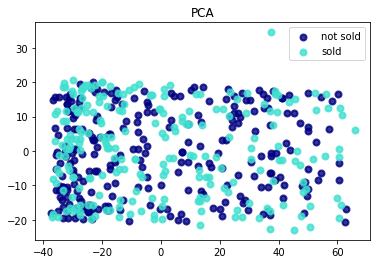

<Figure size 432x288 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
target_names = ["not sold","sold"]
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
colors = ['navy', 'turquoise']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.figure()
plt.show()

# 4-1/ Train/Test Split


In [1]:
# Classification Project: Sonar rocks or mines

# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



# Spiral

### Descriptive statistics


(312, 3)
0    float64
1    float64
2      int64
dtype: object
        0     1  2
0   31.95  7.95  3
1   31.15  7.30  3
2   30.45  6.65  3
3   29.70  6.00  3
4   28.90  5.55  3
5   28.05  5.00  3
6   27.20  4.55  3
7   26.35  4.15  3
8   25.40  3.85  3
9   24.60  3.60  3
10  23.60  3.30  3
11  22.75  3.15  3
12  21.85  3.05  3
13  20.90  3.00  3
14  20.00  2.90  3
15  19.10  3.00  3
16  18.20  3.20  3
17  17.30  3.25  3
18  16.55  3.50  3
19  15.70  3.70  3
             0        1        2
count  312.000  312.000  312.000
mean    18.408   16.345    2.016
std      7.300    6.867    0.816
min      3.000    2.900    1.000
25%     12.912   11.337    1.000
50%     18.325   16.050    2.000
75%     23.400   21.363    3.000
max     31.950   31.650    3.000


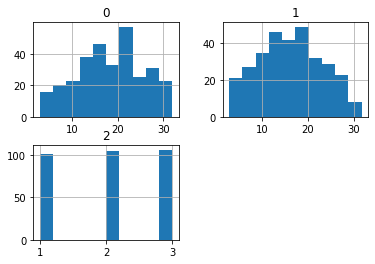

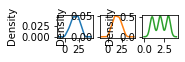

In [2]:

# Load dataset
url = 'spiral.txt'
dataset = read_csv(url, sep="\t", header=None)
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


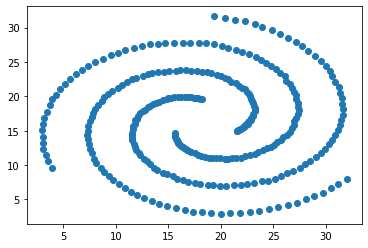

In [3]:
#nuage de points
x=dataset[0]
y=dataset[1]
size = [100,500,100,500,100,500,100,500]
pyplot.scatter(x,y)
pyplot.show()

### Scatter plot matrix & correlation matrix


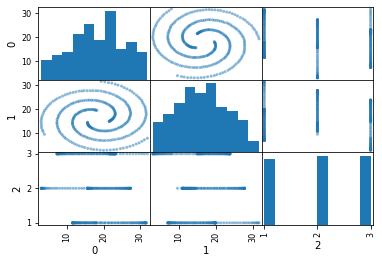

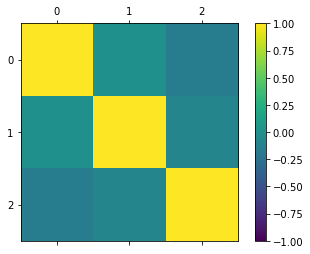

In [4]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


### Prepare Data
### Split-out validation dataset


In [5]:
array = dataset.values
X = array[:,:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


### Evaluate Algorithms
### Test options and evaluation metric

In [6]:
num_folds = 10
seed = 7

### Spot Check Algorithms

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
LR: 0.329000 (0.076479)
LDA: 0.329000 (0.076479)
KNN: 0.996000 (0.012000)
CART: 0.992000 (0.016000)
NB: 0.325167 (0.074119)
SVM: 0.939667 (0.048315)
----------------------------------------
this is  make_scorer(f1_score, average=weighted, labels=[2])  scoring
----------------------------------------
LR: 0.284079 (0.109085)
LDA: 0.284079 (0.109085)
KNN: 1.000000 (0.000000)
CART: 0.987045 (0.026474)
NB: 0.304243 (0.124307)
SVM: 0.927183 (0.065681)


### Compare Algorithms

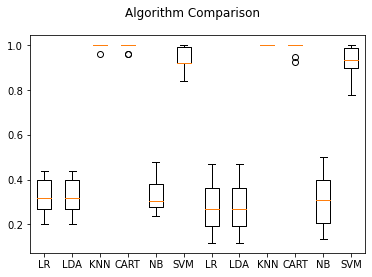

In [8]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Interprétation des résultats:


### Standardize the dataset

In [9]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
resu = []
names = []
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_res = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        resu.append(cv_res)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_res.mean(), cv_res.std())
        print(msg)


----------------------------------------
this is  accuracy  scoring
----------------------------------------
ScaledLR: 0.329000 (0.076479)
ScaledLDA: 0.329000 (0.076479)
ScaledKNN: 0.996000 (0.012000)
ScaledCART: 0.996000 (0.012000)
ScaledNB: 0.325167 (0.074119)
ScaledSVM: 0.939667 (0.048315)
----------------------------------------
this is  make_scorer(f1_score, average=weighted, labels=[2])  scoring
----------------------------------------
ScaledLR: 0.284079 (0.109085)
ScaledLDA: 0.284079 (0.109085)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 0.992308 (0.023077)
ScaledNB: 0.304243 (0.124307)
ScaledSVM: 0.927183 (0.065681)


### Compare Algorithms

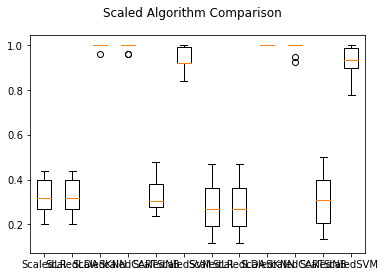

In [10]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


#### Interprétation :
    - après la normalisation de nos données on remarque une trés legère hausse dans les résultats de scoring(accuracy + F-measure)

### Tune scaled KNN

In [11]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
0.996000 (0.012000) with: {'n_neighbors': 5}
0.988000 (0.018330) with: {'n_neighbors': 7}
0.967833 (0.046679) with: {'n_neighbors': 9}
0.959833 (0.047331) with: {'n_neighbors': 11}
0.935833 (0.062420) with: {'n_neighbors': 13}
0.923833 (0.072472) with: {'n_neighbors': 15}
0.895833 (0.101405) with: {'n_neighbors': 17}
0.827833 (0.105699) with: {'n_neighbors': 19}
0.799667 (0.097576) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
0.986667 (0.026667) with: {

 - KNeighborsClassifier (avec nb de voisins par défaut = 5) et KNeighborsClassifier (avec nb de voisins définie) ont donné des scores élevés pour des petites valeurs de k (k : nb de voisins).
 - On remarque que plus qu'on augmente le k plus que le score baisse. 

### Tune scaled SVM

In [12]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.980000 using {'C': 2.0, 'kernel': 'rbf'}
0.333000 (0.068125) with: {'C': 0.1, 'kernel': 'linear'}
0.417167 (0.080492) with: {'C': 0.1, 'kernel': 'poly'}
0.260833 (0.102695) with: {'C': 0.1, 'kernel': 'rbf'}
0.337167 (0.079659) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.337000 (0.068418) with: {'C': 0.3, 'kernel': 'linear'}
0.401167 (0.059768) with: {'C': 0.3, 'kernel': 'poly'}
0.683167 (0.111521) with: {'C': 0.3, 'kernel': 'rbf'}
0.341167 (0.108592) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.337000 (0.068418) with: {'C': 0.5, 'kernel': 'linear'}
0.401333 (0.054797) with: {'C': 0.5, 'kernel': 'poly'}
0.887333 (0.062000) with: {'C': 0.5, 'kernel': 'rbf'}
0.248833 (0.070585) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.337000 (0.068418) with: {'C': 0.7, 'kernel': 'linear'}
0.405333 (0.061449) with: {'C': 0.7, 'kernel': 'poly'}
0.923667 (0.055024) with: {'C': 0.7, 'kernel': 'rbf'}
0.1966

 - La méthode Tune scaled SVM a donné un score égale à 98% pour les deux méthodes de scoring avec c = 2 et kernel = rbf  ce qui est largement supèrieur aux scores obtenus auparavant par ScaledSVM (92%).
 - les autres valeurs de kernel(linear et poly) ont donné des scores trés faibles et inchangés en variant le c.
 - pour kernel = sigmoid on a remarqué que plus que le c est grand plus que le score est petit.
 - On peut dire que pour des valeurs plus élevées de C, une marge plus faible sera acceptée si la fonction de décision est meilleure pour classer correctement tous les points d'apprentissage. Un C plus faible encouragera une marge plus importante, donc une fonction de décision plus simple, au détriment de la précision du modèle.

In [13]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.795000 (0.081394)
GBM: 0.968000 (0.039192)
RF: 0.980000 (0.026833)
ET: 1.000000 (0.000000)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
AB: 0.748787 (0.139515)
GBM: 0.962030 (0.048903)
RF: 0.974530 (0.040274)
ET: 1.000000 (0.000000)


### Compare Algorithms

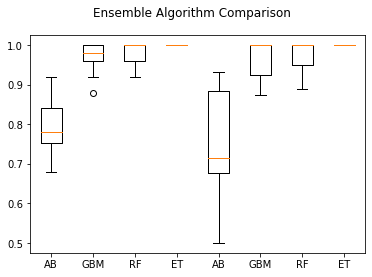

In [14]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



 - ExtraTreesClassifier a donné le meilleur score 1.0 ensuire les deux méthodes RF et GBM avec des scores proches 0.97, 0.96 puis AB avec 0.79 pour l'accuracy et 0.74 pour F-measure.

### Finalize Model


In [15]:
### prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9523809523809523
[[17  0  0]
 [ 0 21  0]
 [ 0  3 22]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       0.88      1.00      0.93        21
         3.0       1.00      0.88      0.94        25

    accuracy                           0.95        63
   macro avg       0.96      0.96      0.96        63
weighted avg       0.96      0.95      0.95        63



# Aggregation 

### Descriptive statistics

(788, 3)
0    float64
1    float64
2      int64
dtype: object
        0      1  2
0   15.55  28.65  2
1   14.90  27.55  2
2   14.45  28.35  2
3   14.15  28.80  2
4   13.75  28.05  2
5   13.35  28.45  2
6   13.00  29.15  2
7   13.45  27.50  2
8   13.60  26.50  2
9   12.80  27.35  2
10  12.40  27.85  2
11  12.30  28.40  2
12  12.20  28.65  2
13  13.40  25.10  2
14  12.95  25.95  2
15  12.90  26.50  2
16  11.85  27.00  2
17  11.35  28.00  2
18  11.15  28.70  2
19  11.25  27.40  2
             0        1        2
count  788.000  788.000  788.000
mean    19.567   14.172    3.770
std      9.922    8.090    1.596
min      3.350    1.950    1.000
25%     11.150    7.037    2.000
50%     18.225   11.725    4.000
75%     30.700   21.962    5.000
max     36.550   29.150    7.000


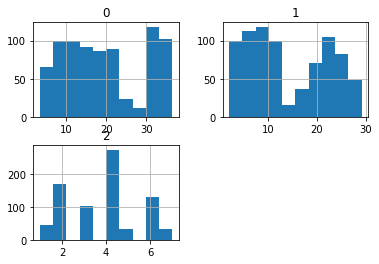

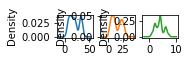

In [11]:

# Load dataset
url = 'Aggregation.txt'
dataset = read_csv(url, sep="\t", header=None)
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


### Scatter plot matrix & correlation matrix

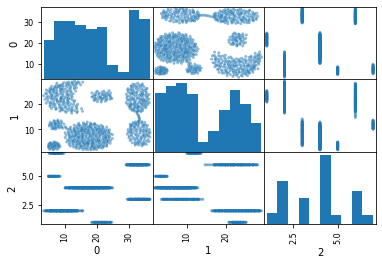

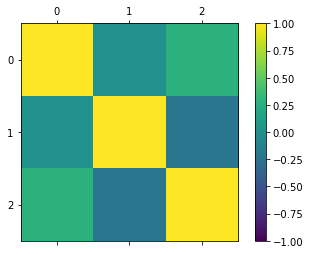

In [12]:

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


### Prepare Data
### Split-out validation dataset

In [13]:
array = dataset.values
X = array[:,:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms
### Test options and evaluation metric

In [14]:
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]

### Spot Check Algorithms

In [17]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------


C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.977778 (0.023757)
LDA: 0.993651 (0.014548)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.998413 (0.004762)
SVM: 0.998413 (0.004762)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------


C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.975177 (0.031663)
LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


### Compare Algorithms

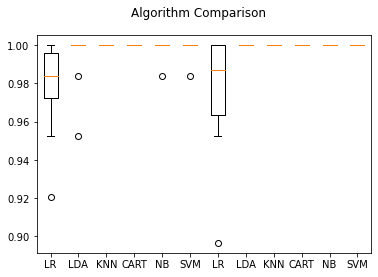

In [21]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Standardize the dataset

In [22]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
ScaledLR: 0.992063 (0.010648)
ScaledLDA: 0.993651 (0.014548)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 0.998413 (0.004762)
ScaledSVM: 0.998413 (0.004762)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
ScaledLR: 0.996552 (0.010345)
ScaledLDA: 1.000000 (0.000000)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 1.000000 (0.000000)
ScaledSVM: 1.000000 (0.000000)


### Compare Algorithms

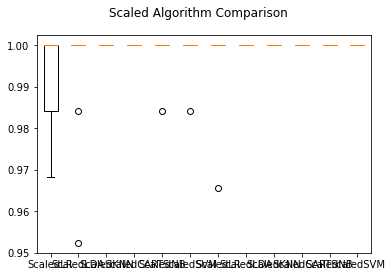

In [23]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


### Tune scaled KNN

In [24]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 5}
0.996825 (0.006349) with: {'n_neighbors': 1}
0.998413 (0.004762) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
0.996825 (0.006349) with: {'n_neighbors': 7}
0.996825 (0.006349) with: {'n_neighbors': 9}
0.996825 (0.006349) with: {'n_neighbors': 11}
0.996825 (0.006349) with: {'n_neighbors': 13}
0.996825 (0.006349) with: {'n_neighbors': 15}
0.996825 (0.006349) with: {'n_neighbors': 17}
0.996825 (0.006349) with: {'n_neighbors': 19}
0.996825 (0.006349) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
1.000000 (0.000000) with: {

In [25]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.998413 using {'C': 0.3, 'kernel': 'linear'}
0.960317 (0.026797) with: {'C': 0.1, 'kernel': 'linear'}
0.890476 (0.050420) with: {'C': 0.1, 'kernel': 'poly'}
0.933333 (0.025397) with: {'C': 0.1, 'kernel': 'rbf'}
0.860317 (0.047513) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.998413 (0.004762) with: {'C': 0.3, 'kernel': 'linear'}
0.955556 (0.018511) with: {'C': 0.3, 'kernel': 'poly'}
0.998413 (0.004762) with: {'C': 0.3, 'kernel': 'rbf'}
0.900000 (0.038260) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.998413 (0.004762) with: {'C': 0.5, 'kernel': 'linear'}
0.969841 (0.016572) with: {'C': 0.5, 'kernel': 'poly'}
0.998413 (0.004762) with: {'C': 0.5, 'kernel': 'rbf'}
0.922222 (0.032877) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.998413 (0.004762) with: {'C': 0.7, 'kernel': 'linear'}
0.976190 (0.016265) with: {'C': 0.7, 'kernel': 'poly'}
0.998413 (0.004762) with: {'C': 0.7, 'kernel': 'rbf'}
0.9

In [26]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.907937 (0.041270)
GBM: 0.990476 (0.007776)
RF: 0.998413 (0.004762)
ET: 0.996825 (0.006349)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
AB: 0.889617 (0.056443)
GBM: 0.996296 (0.011111)
RF: 1.000000 (0.000000)
ET: 1.000000 (0.000000)


### Compare Algorithms

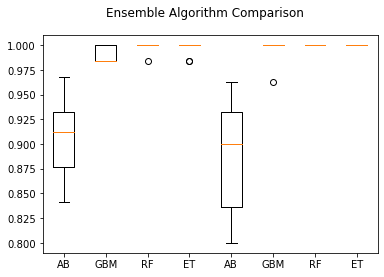

In [27]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Finalize Model
### prepare the model

In [28]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9936708860759493
[[11  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 57  0  0  1]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        31
         3.0       1.00      1.00      1.00        20
         4.0       1.00      0.98      0.99        58
         5.0       1.00      1.00      1.00        12
         6.0       1.00      1.00      1.00        23
         7.0       0.75      1.00      0.86         3

    accuracy                           0.99       158
   macro avg       0.96      1.00      0.98       158
weighted avg       1.00      0.99      0.99       158



# Flame 

### Descriptive statistics

(240, 3)
0    float64
1    float64
2      int64
dtype: object
       0      1  2
0   1.85  27.80  1
1   1.35  26.65  1
2   1.40  23.25  2
3   0.85  23.05  2
4   0.50  22.35  2
5   0.65  21.35  2
6   1.10  22.05  2
7   1.35  22.65  2
8   1.95  22.80  2
9   2.40  22.45  2
10  1.80  22.00  2
11  2.50  21.85  2
12  2.95  21.40  2
13  1.90  21.25  2
14  1.35  21.45  2
15  1.35  20.90  2
16  1.25  20.35  2
17  1.75  20.05  2
18  2.00  20.60  2
19  2.50  21.00  2
             0        1        2
count  240.000  240.000  240.000
mean     7.324   20.929    1.637
std      3.203    3.383    0.482
min      0.500   14.450    1.000
25%      5.250   18.238    1.000
50%      7.300   20.775    2.000
75%      9.312   23.562    2.000
max     14.200   27.800    2.000


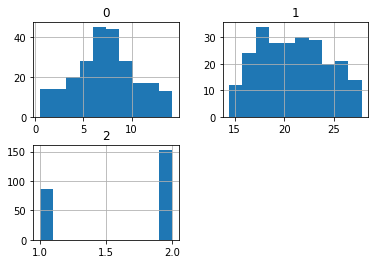

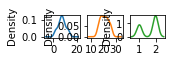

In [29]:
# Load dataset
url = 'flame.txt'
dataset = read_csv(url, sep="\t", header=None)
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


### Scatter plot matrix & correlation matrix

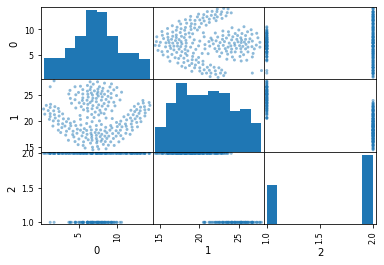

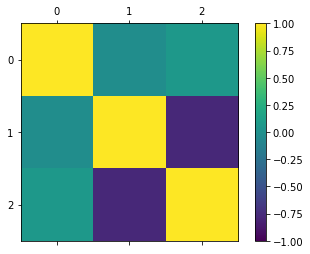

In [30]:
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


### Prepare Data
### Split-out validation dataset

In [31]:
array = dataset.values
X = array[:,:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms
### Test options and evaluation metric

In [32]:
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]

### Spot Check Algorithms

In [33]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
LR: 0.895263 (0.041456)
LDA: 0.890000 (0.044423)
KNN: 0.984211 (0.024119)
CART: 0.984211 (0.024119)
NB: 0.958158 (0.039323)
SVM: 0.978947 (0.025784)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
LR: 0.914170 (0.034881)
LDA: 0.909460 (0.037321)
KNN: 0.986025 (0.021855)
CART: 0.985474 (0.022428)
NB: 0.963389 (0.038721)
SVM: 0.983585 (0.020582)


### Compare Algorithms

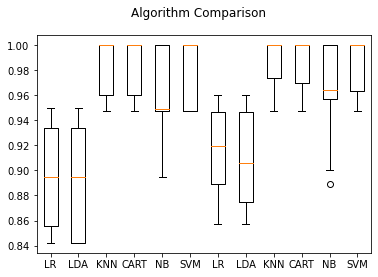

In [34]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Standardize the dataset

In [35]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


--------------------------------------------
accuracy scoring
--------------------------------------------
ScaledLR: 0.885000 (0.039980)
ScaledLDA: 0.890000 (0.044423)
ScaledKNN: 0.984211 (0.024119)
ScaledCART: 0.984211 (0.024119)
ScaledNB: 0.958158 (0.039323)
ScaledSVM: 0.989474 (0.021053)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
ScaledLR: 0.905800 (0.037416)
ScaledLDA: 0.909460 (0.037321)
ScaledKNN: 0.986025 (0.021855)
ScaledCART: 0.985474 (0.022428)
ScaledNB: 0.963389 (0.038721)
ScaledSVM: 0.991289 (0.017889)


### Compare Algorithms

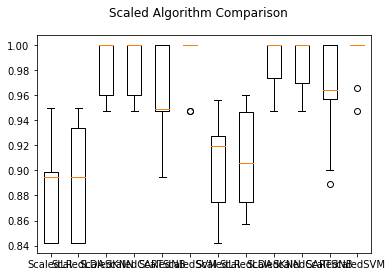

In [36]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Tune scaled KNN

In [37]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.995000 using {'n_neighbors': 1}
0.995000 (0.015000) with: {'n_neighbors': 1}
0.989474 (0.021053) with: {'n_neighbors': 3}
0.984211 (0.024119) with: {'n_neighbors': 5}
0.984211 (0.024119) with: {'n_neighbors': 7}
0.989474 (0.021053) with: {'n_neighbors': 9}
0.989474 (0.021053) with: {'n_neighbors': 11}
0.994737 (0.015789) with: {'n_neighbors': 13}
0.984211 (0.024119) with: {'n_neighbors': 15}
0.984211 (0.024119) with: {'n_neighbors': 17}
0.989474 (0.021053) with: {'n_neighbors': 19}
0.989474 (0.021053) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
Best: 0.995238 using {'n_neighbors': 1}
0.995238 (0.014286) with: {'n_neighbors': 1}
0.989474 (0.021053) with: {'n_neighbors': 3}
0.986025 (0.021855) with: {'n_neighbors': 5}
0.986025 (0.021855) with: {

### Tune scaled SVM

In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.989474 using {'C': 1.0, 'kernel': 'rbf'}
0.885263 (0.039722) with: {'C': 0.1, 'kernel': 'linear'}
0.797632 (0.120964) with: {'C': 0.1, 'kernel': 'poly'}
0.973684 (0.035306) with: {'C': 0.1, 'kernel': 'rbf'}
0.890263 (0.037366) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.885263 (0.039722) with: {'C': 0.3, 'kernel': 'linear'}
0.818684 (0.105240) with: {'C': 0.3, 'kernel': 'poly'}
0.984211 (0.024119) with: {'C': 0.3, 'kernel': 'rbf'}
0.875000 (0.034618) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.885263 (0.039722) with: {'C': 0.5, 'kernel': 'linear'}
0.828684 (0.097988) with: {'C': 0.5, 'kernel': 'poly'}
0.984211 (0.024119) with: {'C': 0.5, 'kernel': 'rbf'}
0.869737 (0.035213) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.885263 (0.039722) with: {'C': 0.7, 'kernel': 'linear'}
0.833947 (0.099962) with: {'C': 0.7, 'kernel': 'poly'}
0.978947 (0.025784) with: {'C': 0.7, 'kernel': 'rbf'}
0.8644

In [39]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.968684 (0.034762)
GBM: 0.979211 (0.025472)
RF: 0.989474 (0.021053)
ET: 0.994737 (0.015789)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
AB: 0.970153 (0.032010)
GBM: 0.981126 (0.023384)
RF: 0.989474 (0.021053)
ET: 0.994737 (0.015789)


### Compare Algorithms

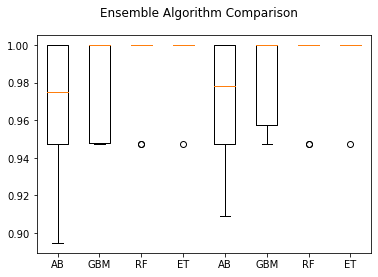

In [40]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



### Finalize Model
### prepare the model

In [41]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[13  0]
 [ 0 35]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



# Interprétation :
 - Dataset aggregation :
   - Les méthodes LogisticRegression, LinearDiscriminantAnalysis et GaussianNB ont donné des scores trés elevés parraport à ceux obetenus avec le premier dataset (spiral).
   - Tune scaled SVM a donné un meilleur score égale à  0.998413 pour c = 0.3 et kernel = 'linear' (scoring méthode = accuracy) 
 - Dataset Flame : 
   - Les méthodes LogisticRegression, LinearDiscriminantAnalysis et GaussianNB ont donné des scores trés elevés parraport à ceux obetenus avec le premier dataset (spiral) mais moins elevés parraport au 2eme dataset(aggregation).
   - Tune scaled SVM a donné un meilleur score égale à  0.989474 pour c = 1.0 et kernel = 'rbf' (scoring méthode = accuracy).
 - ce qui justifie:
   - la non linéarité de la première solution (spiral).
   - la linéarité de la deuxième solution (aggregation).
   - la non linéarité de la troisième solution qui peut être classé comme une solution linéare avec un score considérable mais ce n'est pas le meilleur.

# 2/ Etude de cas pratiques

### (clients d’une banque, transactions bancaires)

In [230]:
# Load dataset
url = 'creditcard.csv'
dataset = read_csv(url)
dataset.info()

# Summarize Data
#dataset
# histograms
#df.hist()
#pyplot.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### REDUCTION DE LA DEMENTION

Pour objectif de réduire le nombre de variables de travail et pour ne pas tomber dans le problème de surapprentissage on va essayer de cibler les variables qui sont corrélées + les variables qui porte pas d'informations (variables supplémentaire) pour les enlever.

### COORELATION

#### D'abord on va afficher la matrice de corrélation pour savoir si y'en a des variables corrélées

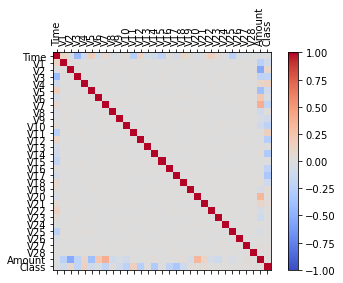

----------------


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()
print("----------------")
#etude de la correlation
# matrice_corr = dataset.corr().round(1)
# sns.heatmap(data=matrice_corr, annot=True)
# plt.savefig('fig2.png')

En regardant la figure ci-dessus on peut dire qu'il n'y a pas de corrélation entre nos variables, donc ca sera pas possibles d'éliminer des variables on se basant sur cette démarche.

##### Coeficient de Regression linéaire & Reduction du nombre des variables à 10

 - on va calculer les coéfficients de la régression linéaire pour cibler les variables qui portent le plus d'information.  

##### Sélection des variables avant le data balancing :

In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np
# # Split-out validation dataset
array = dataset.values
X = array[:,:30].astype(float)
print(type(X))
Y = array[:,30]
reg = LinearRegression().fit(X, Y)
reg.score(X,Y)
print("#------------------  les Coefs de regression  ----------------------")
print(reg.coef_)
#---------    les 10 premieres variables  ---------------

li = []
for i in reg.coef_:
    li.append(abs(i))
index = []
for i in range(0,30):
    index.append(i)
resultat = [[note, nom] for note, nom in zip(li, index)]
li.sort()
li =li[0:10]
#--------  les variables à supprimer  -------------------
ind=[]
for i in li:
    for j in resultat:
        if i == j[0]:
            ind.append(j[1])
sup = []
for i in range(0,30):
    if i not in ind:
        sup.append(i)
print("#------------------  les variables à supprimer  ----------------------")
print(sup)
print("#------------------  les variables à garder     ----------------------")
print(ind)
X_new = np.delete(X,sup,1)
X_new.shape[1]
X =X_new

<class 'numpy.ndarray'>
#------------------  les Coefs de regression  ----------------------
[-4.39426334e-09 -1.92862035e-03  2.86900915e-03 -5.09422397e-03
  3.77396705e-03 -2.33149107e-03 -1.65970556e-03 -6.84506821e-03
  8.38699133e-04 -3.62393138e-03 -8.09929073e-03  6.25021700e-03
 -1.07873207e-02 -2.13985211e-04 -1.31908206e-02 -2.27611848e-04
 -9.30353028e-03 -1.59962257e-02 -5.57693390e-03  1.90500163e-03
  2.82324488e-04  2.03985251e-03  2.46947758e-04  1.60584609e-04
 -5.15860934e-04  3.34058231e-04  3.77638890e-04  1.67849544e-03
  1.13827037e-03  7.13885807e-06]
#------------------  les variables à supprimer  ----------------------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 21, 27, 28]
#------------------  les variables à garder     ----------------------
[0, 29, 23, 13, 15, 22, 20, 25, 26, 24]


# Data balancing

In [45]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [46]:
from sklearn.utils import resample
import pandas as pd
df_majority = dataset[dataset.Class==0]
df_minority = dataset[dataset.Class==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dataset = pd.concat([df_majority, df_minority_upsampled])
dataset['Class'].value_counts()


0    284315
1    284315
Name: Class, dtype: int64

#### Sélection des variables après le data balancing :

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np
# # Split-out validation dataset
array = dataset.values
X = array[:,:30].astype(float)
print(type(X))
Y = array[:,30]
reg = LinearRegression().fit(X, Y)
reg.score(X,Y)
print("#------------------  les Coefs de regression  ----------------------")
print(reg.coef_)
#---------    les 10 premieres variables  ---------------

li = []
for i in reg.coef_:
    li.append(abs(i))
index = []
for i in range(0,30):
    index.append(i)
resultat = [[note, nom] for note, nom in zip(li, index)]
li.sort()
li =li[0:10]
#--------  les variables à supprimer  -------------------
ind=[]
for i in li:
    for j in resultat:
        if i == j[0]:
            ind.append(j[1])
sup = []
for i in range(0,30):
    if i not in ind:
        sup.append(i)
print("#------------------  les variables à supprimer  ----------------------")
print(sup)
print("#------------------  les variables à garder     ----------------------")
print(ind)
X_new = np.delete(X,sup,1)
X_new.shape[1]
X =X_new

<class 'numpy.ndarray'>
#------------------  les Coefs de regression  ----------------------
[-5.63743824e-07 -1.73136484e-02  8.84986759e-03 -9.70615785e-03
  5.85054002e-02  1.23344345e-02 -1.84019843e-02  2.90053115e-02
 -1.52896342e-02  1.45171661e-02 -1.73895571e-02 -7.81658164e-03
  1.50519341e-02 -2.55270180e-02 -5.38584755e-02 -7.49670467e-03
  1.87089134e-03 -1.50622191e-02  3.00083639e-02  1.54093306e-02
  7.09894147e-03  1.41720115e-02  3.97860379e-02 -2.38018204e-02
  7.78095172e-03 -1.21212830e-03 -7.06398606e-02 -4.64047756e-03
  4.69579237e-02  1.08151142e-04]
#------------------  les variables à supprimer  ----------------------
[1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 21, 22, 23, 26, 28]
#------------------  les variables à garder     ----------------------
[0, 29, 25, 16, 27, 20, 15, 24, 11, 2]


### Remarque :

 - On remarque que les variables selectionnées avant et après le data balancing ne sont pas les mêmes ce qui justifie l'effet du data balancing.

### Préparation des données (reduction du nombre de variables )

In [48]:
### Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,:30].astype(float)
X_new = np.delete(X,sup,1) # supression des variables
X = X_new
Y = array[:,30]
validation_size = 0.5
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size,random_state=seed)



In [49]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [126]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
LR: 0.853240 (0.016829)
LDA: 0.875325 (0.001877)
KNN: 0.996201 (0.000380)
CART: 0.999557 (0.000106)
NB: 0.829921 (0.001779)
--------------------------------------------
make_scorer(f1_score, average=weighted) scoring
--------------------------------------------
LR: 0.853128 (0.016686)
LDA: 0.873745 (0.001947)
KNN: 0.996201 (0.000380)
CART: 0.999532 (0.000092)
NB: 0.825457 (0.001891)


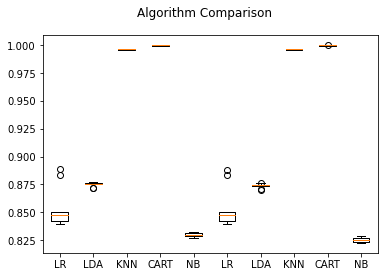

In [128]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [129]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
ScaledLR: 0.893509 (0.002025)
ScaledLDA: 0.875325 (0.001877)
ScaledKNN: 0.999177 (0.000247)
ScaledCART: 0.999550 (0.000075)
ScaledNB: 0.882919 (0.002101)
--------------------------------------------
make_scorer(f1_score, average=weighted) scoring
--------------------------------------------
ScaledLR: 0.893061 (0.002044)
ScaledLDA: 0.873745 (0.001947)
ScaledKNN: 0.999177 (0.000247)
ScaledCART: 0.999536 (0.000089)
ScaledNB: 0.882120 (0.002139)


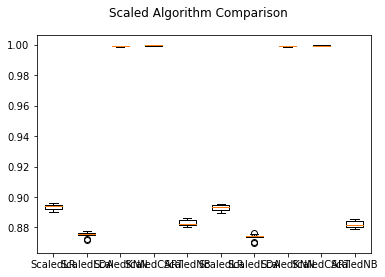

In [130]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Comparaison des resultats :

 - Data balancing :
     - pour toutes les méthodes on a eu des résultats elevés (entre 0.8 et 0.9) ce qui valide notre démarche d'équilibrer les données (où on avait 284315 apparence de la classe 1 contre seulment 492 de la classe 0 ).
 - Data scaling :
     - En regardant le score des méthodes avant et aprés le data scaling on remarque une augmentation de performance dans toutes les méthodes de classification d'ou l'intéret du Data scaling qui aide les méthodes à prendre toutes les données sur la même échelle.

In [135]:
# Pour accélerer l'exécution :
validation_size = 0.99
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size,random_state=seed)
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#[1,3,5,7,9,11,13,15,17,19,21]
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.986106 using {'n_neighbors': 1}
0.986106 (0.005474) with: {'n_neighbors': 1}
0.973444 (0.007799) with: {'n_neighbors': 3}
0.955506 (0.011084) with: {'n_neighbors': 5}
0.939326 (0.012382) with: {'n_neighbors': 7}
0.929826 (0.013928) with: {'n_neighbors': 9}
0.921916 (0.014490) with: {'n_neighbors': 11}
0.917520 (0.013612) with: {'n_neighbors': 13}
0.911189 (0.014589) with: {'n_neighbors': 15}
0.915410 (0.014912) with: {'n_neighbors': 17}
0.913653 (0.013987) with: {'n_neighbors': 19}
0.913302 (0.014873) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted) scoring
--------------------------------------------
Best: 0.986108 using {'n_neighbors': 1}
0.986108 (0.005475) with: {'n_neighbors': 1}
0.973445 (0.007809) with: {'n_neighbors': 3}
0.955512 (0.011105) with: {'n_neighbors': 5}
0.939343 (0.012405) with: {'n_neighbors

#### Interprétation :

 - En comparant les résultats du KNeighborsClassifier en utilisant la validation croisée avec Tune scaled KNN (nombre de voisins fixe) on constate que leurs résultats sont bons et trés proches.

In [139]:
validation_size = 0.99
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size,random_state=seed)
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.922794 (0.012461)
GBM: 0.955685 (0.012212)
RF: 0.997889 (0.001056)
ET: 0.999121 (0.001418)
--------------------------------------------
make_scorer(f1_score, average=weighted) scoring
--------------------------------------------
AB: 0.922664 (0.012458)
GBM: 0.955636 (0.012215)
RF: 0.997890 (0.001722)
ET: 0.998944 (0.001167)


#### Interprétation :

 - Pour les méthodes de scoring ('accuracy','F-measure') ce sont RandomForestClassifier et ExtraTreesClassifier qui ont donné les meilleurs résultats avec une légère différence parraport aux autres méthodes.

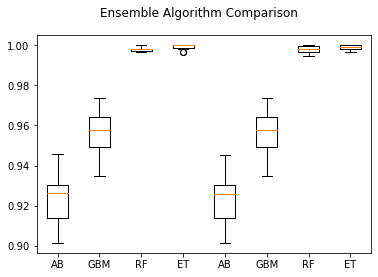

In [142]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [141]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9344606213051387
[[276413   4983]
 [ 31912 249636]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94    281396
         1.0       0.98      0.89      0.93    281548

    accuracy                           0.93    562944
   macro avg       0.94      0.93      0.93    562944
weighted avg       0.94      0.93      0.93    562944



# Visa premier

### Chargement des données 

In [243]:
# Load dataset
import numpy as np
from sklearn.linear_model import LinearRegression
url = 'VisaPremier.txt'
dataset = read_csv(url,sep='\t')
dataset.info()

#Description
#dataset.info()
#dataset['cartevpr'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matricul  1073 non-null   int64 
 1   departem  1073 non-null   object
 2   ptvente   1073 non-null   int64 
 3   sexe      1073 non-null   object
 4   age       1073 non-null   int64 
 5   sitfamil  1073 non-null   object
 6   anciente  1073 non-null   int64 
 7   csp       1073 non-null   object
 8   codeqlt   1073 non-null   object
 9   nbimpaye  1073 non-null   int64 
 10  mtrejet   1073 non-null   int64 
 11  nbopguic  1073 non-null   int64 
 12  moycred3  1073 non-null   int64 
 13  aveparmo  1073 non-null   int64 
 14  endette   1073 non-null   int64 
 15  engagemt  1073 non-null   int64 
 16  engagemc  1073 non-null   int64 
 17  engagemm  1073 non-null   int64 
 18  nbcptvue  1073 non-null   int64 
 19  moysold3  1073 non-null   int64 
 20  moycredi  1073 non-null   int64 
 21  agemvt    1073

###  Nettoyage des données  


In [244]:
# Nettoyage des données  

#sitfamil :
ind = np.where(dataset['sitfamil'] == "F.")
for i in ind:
    inde= list(i)

dataset['sitfamil'] = [1 if a=="Fmar" else 2 if a=="Fcel" else 3 if a=="Fdiv" else 4 if a=="Fuli" else 5 if a=="Fsep" else 6 if a=="Fveu" else 'F.' for a in dataset.sitfamil]

#Departem :
ind = np.where(dataset['departem'] == ".")
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)

#csp
dataset['csp'] = [1 if a=="Pcad" else 2 if a=="Pemp" else 3 if a=="Psan" else 4 if a=="Pouv" else 5 if a=="Part" else 6 if a=="Pret" else 7 if a=="Pinc" else 8 for a in dataset.csp]

#codeqlt
ind = np.where(dataset['codeqlt'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)

dataset['codeqlt'] = [1 if a=="A" else 2 if a=="B" else 3 if a=="C" else 4 if a=="D" else 5 if a=="E" else 6  for a in dataset.codeqlt]

#agemvt
ind = np.where(dataset['agemvt'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)
        
#nbpaiecb      
ind = np.where(dataset['nbpaiecb'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)
        

#Suppression des ROWs 
inde.sort()
for i in inde:
    dataset = dataset.drop(i,axis=0)

#Suppression de la colonne dupliquée cartevp & sexe
dataset = dataset.drop(['cartevp'],axis=1,errors='ignore')
dataset = dataset.drop(['sexe'],axis=1,errors='ignore')


#### - Nettoyage de données :
     - suppression des variables dupliquées cartevp & sexe.
     - suppression des lignes contenant des champs non renseignés.
     - codage des variables qualitatives sitfamil, csp et codeqlt.


#### Sauvegarde du data dans un nouveau fichier .csv : 

In [247]:
dataset.to_csv('CleanDataSet.txt',sep='\t',index = False)
url = 'CleanDataSet.txt'
dataset = read_csv(url,sep='\t')
#Verification
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   matricul  722 non-null    int64
 1   departem  722 non-null    int64
 2   ptvente   722 non-null    int64
 3   sexe      722 non-null    int64
 4   age       722 non-null    int64
 5   sitfamil  722 non-null    int64
 6   anciente  722 non-null    int64
 7   csp       722 non-null    int64
 8   codeqlt   722 non-null    int64
 9   nbimpaye  722 non-null    int64
 10  mtrejet   722 non-null    int64
 11  nbopguic  722 non-null    int64
 12  moycred3  722 non-null    int64
 13  aveparmo  722 non-null    int64
 14  endette   722 non-null    int64
 15  engagemt  722 non-null    int64
 16  engagemc  722 non-null    int64
 17  engagemm  722 non-null    int64
 18  nbcptvue  722 non-null    int64
 19  moysold3  722 non-null    int64
 20  moycredi  722 non-null    int64
 21  agemvt    722 non-null    int64
 22  nb

In [249]:
### Prepare Data
from sklearn.linear_model import LinearRegression
import numpy as np
# Split-out validation dataset
array = dataset.values
Y = array[:,45]
dataset1 = dataset.drop(['cartevpr'],axis=1,errors='ignore')
array = dataset1.values
print("------------------------ dataset nettoyé ------------------------")
dataset1.info()
print("-----------------------------------------------------------------")
X = array[:,:].astype(float)
reg = LinearRegression().fit(X,Y)
reg.score(X,Y)
print("#------------------  les Coefs de regression  ----------------------")
print(reg.coef_)
#---------    les 10 premieres variables  ---------------
li = []
for i in reg.coef_:
    li.append(abs(i))
index = []
for i in range(0,46):
    index.append(i)
resultat = [[note, nom] for note, nom in zip(li, index)]
li.sort()
li =li[0:10]
#--------  les variables à supprimer  -------------------
ind=[]
for i in li:
    for j in resultat:
        if i == j[0]:
            ind.append(j[1])
sup = []
for i in range(0,46):
    if i not in ind:
        sup.append(i)
print("#------------------  les variables à supprimer  ----------------------")
print(sup)
print("#------------------  les variables à garder     ----------------------")
print(ind)
X_new = np.delete(X,sup,1)
X_new.shape[1]
X =X_new
#-------------------------------------------------------------------------------------------
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



------------------------ dataset nettoyé ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   matricul  722 non-null    int64
 1   departem  722 non-null    int64
 2   ptvente   722 non-null    int64
 3   sexe      722 non-null    int64
 4   age       722 non-null    int64
 5   sitfamil  722 non-null    int64
 6   anciente  722 non-null    int64
 7   csp       722 non-null    int64
 8   codeqlt   722 non-null    int64
 9   nbimpaye  722 non-null    int64
 10  mtrejet   722 non-null    int64
 11  nbopguic  722 non-null    int64
 12  moycred3  722 non-null    int64
 13  aveparmo  722 non-null    int64
 14  endette   722 non-null    int64
 15  engagemt  722 non-null    int64
 16  engagemc  722 non-null    int64
 17  engagemm  722 non-null    int64
 18  nbcptvue  722 non-null    int64
 19  moysold3  722 non-null    int64
 20  moycredi  

In [250]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [251]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter = 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
LR: 0.661978 (0.028899)
LDA: 0.689988 (0.093788)
KNN: 0.658802 (0.071997)
CART: 0.639685 (0.069439)
NB: 0.671083 (0.080416)
SVM: 0.632910 (0.074581)
----------------------------------------
this is  make_scorer(f1_score, average=weighted)  scoring
----------------------------------------
LR: 0.663095 (0.027900)
LDA: 0.664076 (0.103609)
KNN: 0.650778 (0.072722)
CART: 0.642911 (0.071930)
NB: 0.628068 (0.090834)
SVM: 0.576559 (0.083938)


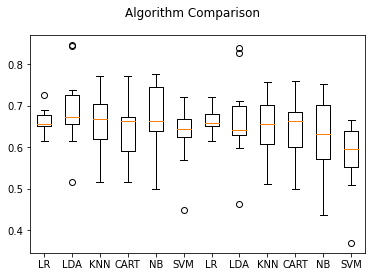

In [252]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Interprétation :
 - après avoir nettoyer nos données et réduire le nombre de variables, on a pu construire des modèles qui ont données des scores considérables (0.6 en moyenne).
 - en jettant un oeil sur nos données on a constaté que les données ne sont pas sur la meme échelle(par exemple age et ancienté) ce qui justifie la faible performance de certains modèles

### Normalisation du dataset :

In [224]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
ScaledLR: 0.717635 (0.085229)
ScaledLDA: 0.689988 (0.093788)
ScaledKNN: 0.709044 (0.077276)
ScaledCART: 0.641319 (0.070139)
ScaledNB: 0.622444 (0.064916)
ScaledSVM: 0.717665 (0.080947)
----------------------------------------
this is  make_scorer(f1_score, average=weighted)  scoring
----------------------------------------
ScaledLR: 0.704625 (0.091163)
ScaledLDA: 0.664076 (0.103609)
ScaledKNN: 0.704230 (0.078416)
ScaledCART: 0.632097 (0.076117)
ScaledNB: 0.537493 (0.075855)
ScaledSVM: 0.705014 (0.085201)


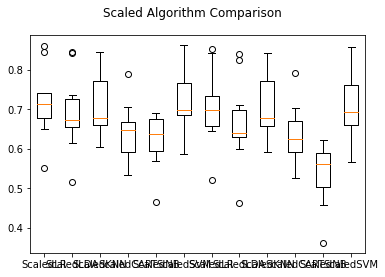

In [225]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Interprétation :
 - aprèes la normalisation du dataset (toutes les variables sur la mêmes échelle) on remarque une hausse de score de tous les modeles(des valeurs entre 0.6 et 0.7) d'où l'importance du Data scaling.

### Tune scaled KNN :

In [253]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

----------------------------------------
this is  accuracy  scoring
----------------------------------------
Best: 0.729643 using {'n_neighbors': 15}
0.672807 (0.081407) with: {'n_neighbors': 1}
0.707229 (0.085803) with: {'n_neighbors': 3}
0.721143 (0.072448) with: {'n_neighbors': 5}
0.721204 (0.069593) with: {'n_neighbors': 7}
0.719328 (0.061525) with: {'n_neighbors': 9}
0.726286 (0.068307) with: {'n_neighbors': 11}
0.727919 (0.072499) with: {'n_neighbors': 13}
0.729643 (0.066949) with: {'n_neighbors': 15}
0.719238 (0.079490) with: {'n_neighbors': 17}
0.722626 (0.068581) with: {'n_neighbors': 19}
0.712371 (0.056521) with: {'n_neighbors': 21}
----------------------------------------
this is  make_scorer(f1_score, average=weighted)  scoring
----------------------------------------
Best: 0.720787 using {'n_neighbors': 15}
0.672628 (0.080862) with: {'n_neighbors': 1}
0.704402 (0.087399) with: {'n_neighbors': 3}
0.717372 (0.073080) with: {'n_neighbors': 5}
0.716667 (0.069900) with: {'n_nei

#### Interprétation :
 - En variant le nombre de voisin les valeurs de score du KNN varient entre 0.6 et 0.7 avec 0.729643 comme score maximal pour n_neighbors=15.
 - Le modele KNN (nb de voisin par défaut) a aussi donné un résultat trés proche.  

In [254]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
AB: 0.717725 (0.072538)
GBM: 0.717725 (0.064118)
RF: 0.712432 (0.064049)
ET: 0.719419 (0.059578)
----------------------------------------
this is  make_scorer(f1_score, average=weighted)  scoring
----------------------------------------
AB: 0.712394 (0.075410)
GBM: 0.708214 (0.055027)
RF: 0.704963 (0.067720)
ET: 0.707891 (0.064661)


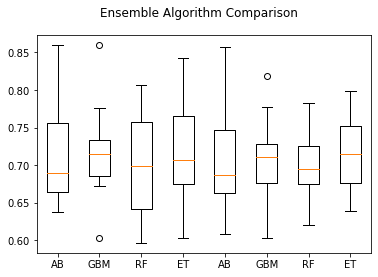

In [228]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Interprétation : 
 - les 4 modeles de classification ont donné des scores trés proche (0.71 pour les deux méthodes de scoring 'accuracy' et F-measure).

In [229]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6896551724137931
[[76 11]
 [34 24]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        87
           1       0.69      0.41      0.52        58

    accuracy                           0.69       145
   macro avg       0.69      0.64      0.64       145
weighted avg       0.69      0.69      0.67       145

